In [7]:
import pandas as pd

with open('../../results/performance_mm.pkl', "rb") as f:
    df = pd.read_pickle(f)

df.columns

Index(['dataset', 'node_idx', 'trial', 'total_train_time', 'final_loss',
       'mem_before_mb', 'mem_after_mb', 'mem_delta_mb', 'subgraph_size',
       'num_edges'],
      dtype='object')

In [8]:
df

,dataset,node_idx,trial,total_train_time,final_loss,mem_before_mb,mem_after_mb,mem_delta_mb,subgraph_size,num_edges
0,BAShapes Sparse,0,0,0.462587,-0.000138,776.394531,779.441406,3.046875,620,3814
1,BAShapes Sparse,1,0,0.453070,-0.000756,780.085938,780.109375,0.023438,587,3706
2,BAShapes Sparse,2,0,0.452680,-0.000084,780.113281,780.132812,0.019531,586,3702
3,BAShapes Sparse,3,0,0.416341,-17.444448,780.132812,780.203125,0.070312,433,3272
4,BAShapes Sparse,4,0,0.453092,-0.000277,780.203125,780.203125,0.000000,519,3514
...,...,...,...,...,...,...,...,...,...,...
1395,BAShapes Dense,695,0,0.537867,-1.792207,791.070312,791.070312,0.000000,339,3008
1396,BAShapes Dense,696,0,0.163903,2.073787,791.070312,791.070312,0.000000,102,628
1397,BAShapes Dense,697,0,0.077793,-0.809870,791.070312,791.070312,0.000000,11,32
1398,BAShapes Dense,698,0,0.159175,-1.024504,791.070312,791.070312,0.000000,102,628


In [9]:
grouped_stats = df.groupby(['dataset', 'node_idx']).agg({
    'total_train_time': 'mean',
    'subgraph_size': 'first',
    'num_edges': 'first',
}).reset_index()

grouped_stats


,dataset,node_idx,total_train_time,subgraph_size,num_edges
0,BAShapes Dense,0,1.835075,620,3814
1,BAShapes Dense,1,1.619793,587,3706
2,BAShapes Dense,2,1.613076,586,3702
3,BAShapes Dense,3,0.897260,433,3272
4,BAShapes Dense,4,1.243605,519,3514
...,...,...,...,...,...
1395,BAShapes Sparse,695,0.378197,339,3008
1396,BAShapes Sparse,696,0.259802,102,628
1397,BAShapes Sparse,697,0.214289,11,32
1398,BAShapes Sparse,698,0.260049,102,628


In [10]:
exp_stats = df.groupby(['dataset']).agg({
    'total_train_time': 'mean',
    'subgraph_size': 'mean',
    'num_edges': 'mean',
}).reset_index()

exp_stats


,dataset,total_train_time,subgraph_size,num_edges
0,BAShapes Dense,0.621667,304.4,2212.488571
1,BAShapes Sparse,0.347791,304.4,2212.488571


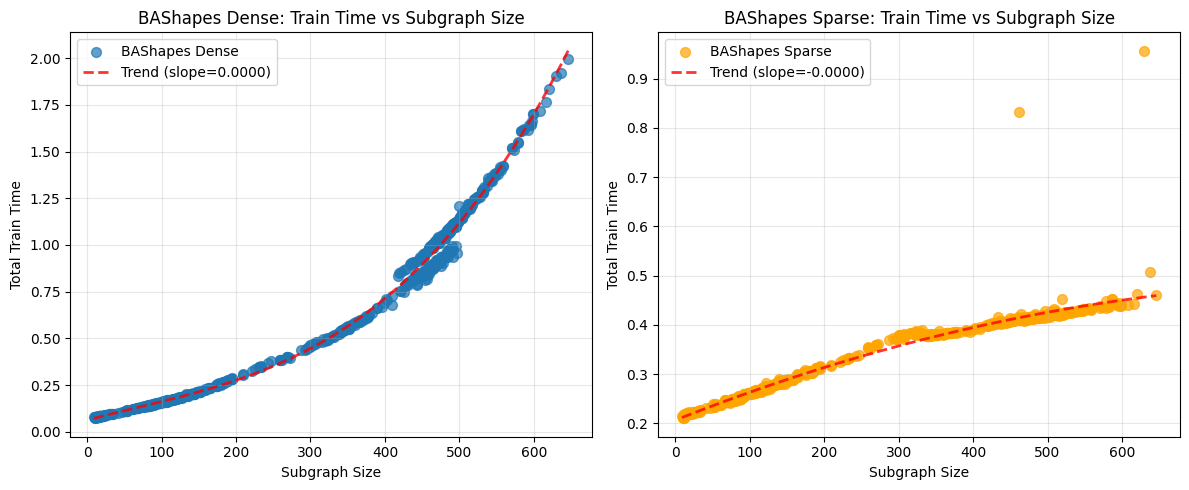

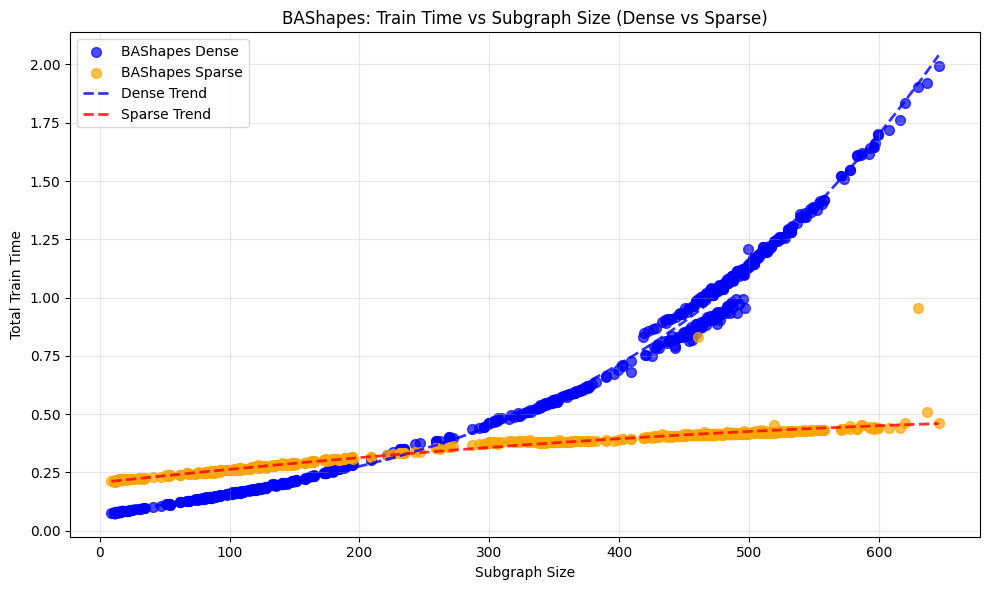

/tmp/ipykernel_761386/3470371998.py:103: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/tmp/ipykernel_761386/3470371998.py:104: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


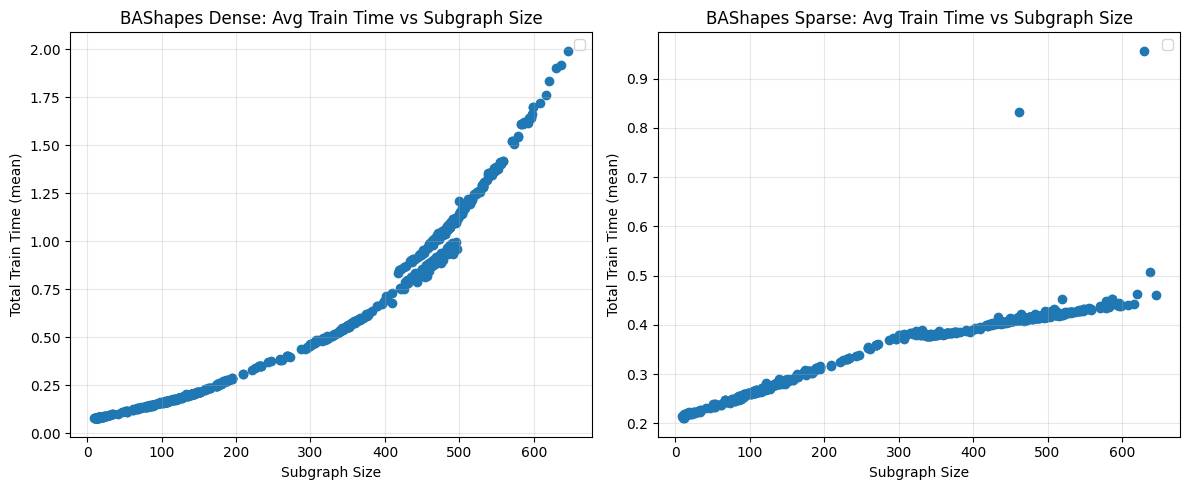

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is named 'df'
# Filter for BAShapes experiments
bashapes_data = df[df['dataset'].isin(['BAShapes Sparse', 'BAShapes Dense'])]

# Create separate dataframes for dense and sparse
bashapes_dense = bashapes_data[bashapes_data['dataset'] == 'BAShapes Dense']
bashapes_sparse = bashapes_data[bashapes_data['dataset'] == 'BAShapes Sparse']

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

x_axis = 'subgraph_size'

# Plot BAShapes Dense
ax1.scatter(bashapes_dense[x_axis], bashapes_dense['total_train_time'],
           alpha=0.7, s=50, label='BAShapes Dense')
ax1.set_xlabel('Subgraph Size')
ax1.set_ylabel('Total Train Time')
ax1.set_title('BAShapes Dense: Train Time vs Subgraph Size')
ax1.grid(True, alpha=0.3)

# Plot BAShapes Sparse
ax2.scatter(bashapes_sparse[x_axis], bashapes_sparse['total_train_time'],
           alpha=0.7, s=50, color='orange', label='BAShapes Sparse')
ax2.set_xlabel('Subgraph Size')
ax2.set_ylabel('Total Train Time')
ax2.set_title('BAShapes Sparse: Train Time vs Subgraph Size')
ax2.grid(True, alpha=0.3)

# Add trend lines if you want
z1 = np.polyfit(bashapes_dense[x_axis], bashapes_dense['total_train_time'], 3)
p1 = np.poly1d(z1)
ax1.plot(bashapes_dense[x_axis].sort_values(),
        p1(bashapes_dense[x_axis].sort_values()),
        "r--", alpha=0.8, linewidth=2, label=f'Trend (slope={z1[0]:.4f})')

z2 = np.polyfit(bashapes_sparse[x_axis], bashapes_sparse['total_train_time'], 2)
p2 = np.poly1d(z2)
ax2.plot(bashapes_sparse[x_axis].sort_values(),
        p2(bashapes_sparse[x_axis].sort_values()),
        "r--", alpha=0.8, linewidth=2, label=f'Trend (slope={z2[0]:.4f})')

ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()

# Alternative: Combined plot with both dense and sparse
plt.figure(figsize=(10, 6))

# Plot both on same figure
plt.scatter(bashapes_dense[x_axis], bashapes_dense['total_train_time'],
           alpha=0.7, s=50, label='BAShapes Dense', color='blue')
plt.scatter(bashapes_sparse[x_axis], bashapes_sparse['total_train_time'],
           alpha=0.7, s=50, label='BAShapes Sparse', color='orange')

plt.xlabel('Subgraph Size')
plt.ylabel('Total Train Time')
plt.title('BAShapes: Train Time vs Subgraph Size (Dense vs Sparse)')
plt.grid(True, alpha=0.3)
plt.legend()

# Add trend lines
plt.plot(bashapes_dense[x_axis].sort_values(),
        p1(bashapes_dense[x_axis].sort_values()),
        "b--", alpha=0.8, linewidth=2, label='Dense Trend')
plt.plot(bashapes_sparse[x_axis].sort_values(),
        p2(bashapes_sparse[x_axis].sort_values()),
        "r--", alpha=0.8, linewidth=2, label='Sparse Trend')

plt.legend()
plt.tight_layout()
plt.show()

# If you have multiple trials and want to show average per subgraph size
if 'trial' in df.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Calculate averages for dense
    dense_avg = bashapes_dense.groupby(x_axis)['total_train_time'].agg(['mean', 'std']).reset_index()
#     ax1.errorbar(dense_avg[x_axis], dense_avg['mean'], yerr=dense_avg['std'],
                # fmt='o', capsize=5, label='BAShapes Dense ± std')
    ax1.scatter(bashapes_dense[x_axis], bashapes_dense['total_train_time'])
    ax1.set_xlabel('Subgraph Size')
    ax1.set_ylabel('Total Train Time (mean)')
    ax1.set_title('BAShapes Dense: Avg Train Time vs Subgraph Size')
    ax1.grid(True, alpha=0.3)

    # Calculate averages for sparse
    sparse_avg = bashapes_sparse.groupby(x_axis)['total_train_time'].agg(['mean', 'std']).reset_index()
#     ax2.errorbar(sparse_avg[x_axis], sparse_avg['mean'], yerr=sparse_avg['std'],
                # fmt='o', capsize=5, color='orange', label='BAShapes Sparse ± std')
    ax2.scatter(bashapes_sparse[x_axis], bashapes_sparse['total_train_time'])
    ax2.set_xlabel('Subgraph Size')
    ax2.set_ylabel('Total Train Time (mean)')
    ax2.set_title('BAShapes Sparse: Avg Train Time vs Subgraph Size')
    ax2.grid(True, alpha=0.3)

    ax1.legend()
    ax2.legend()
    plt.tight_layout()
    plt.savefig()
    plt.show()

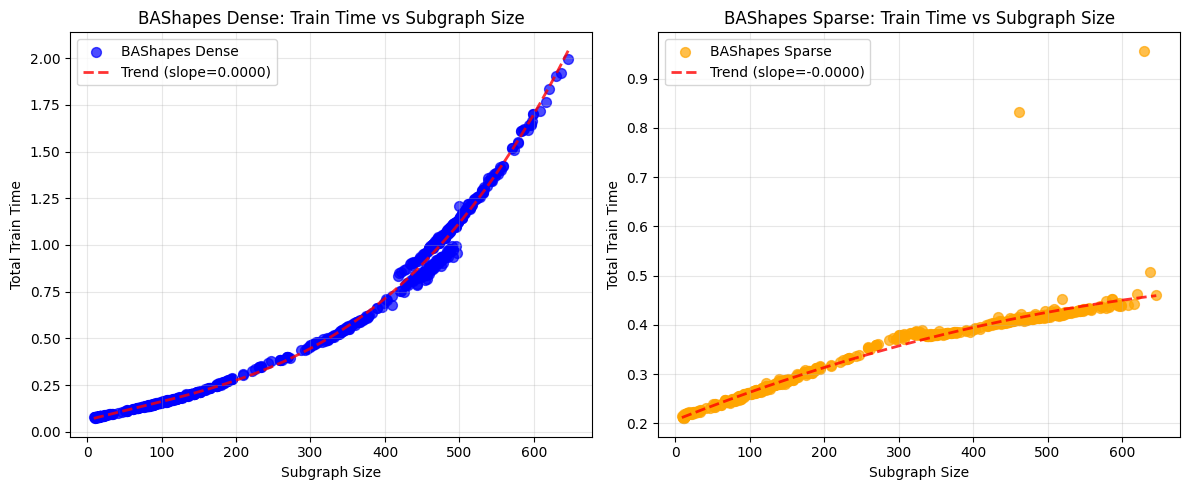

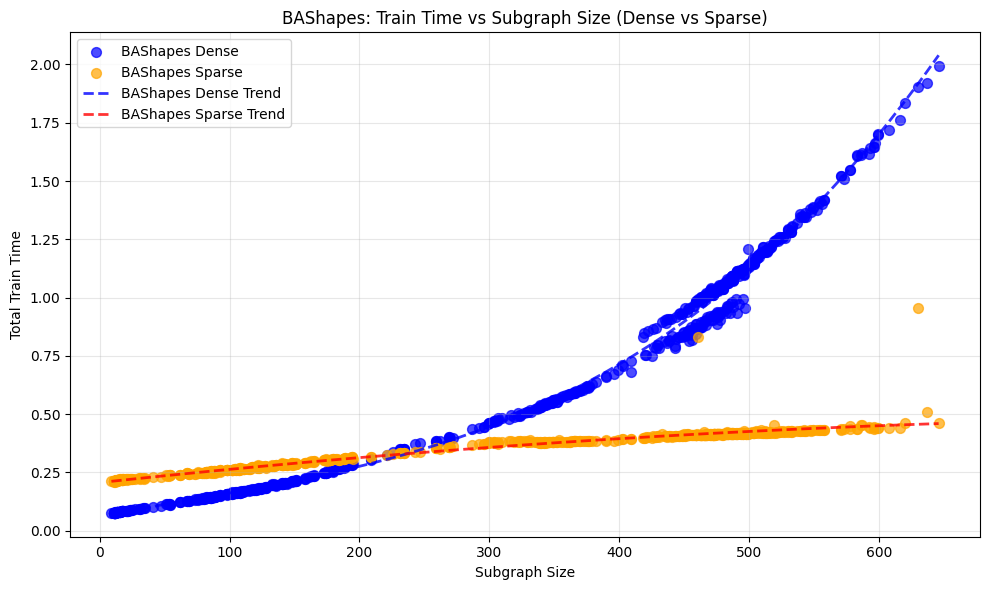

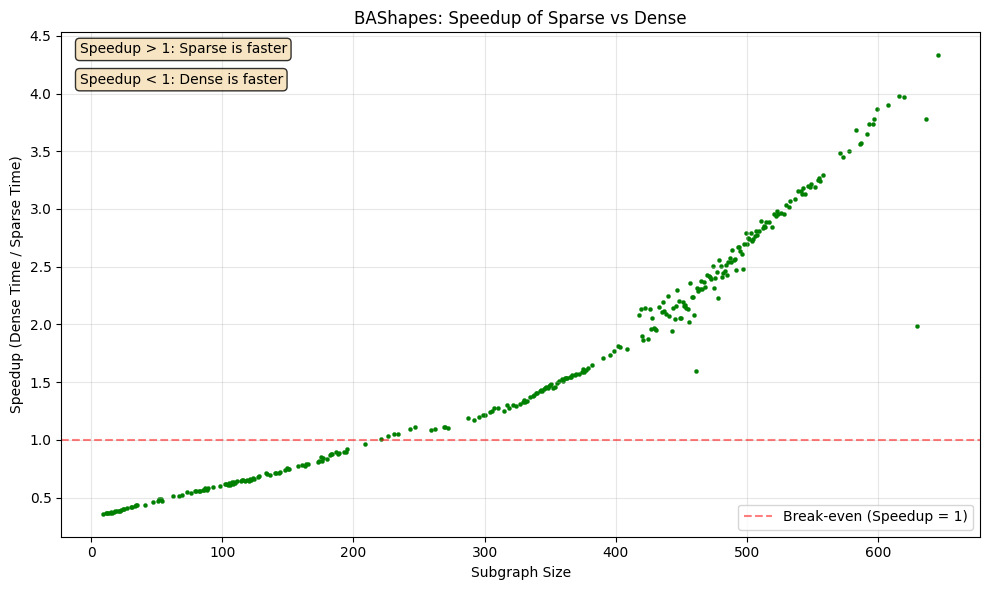

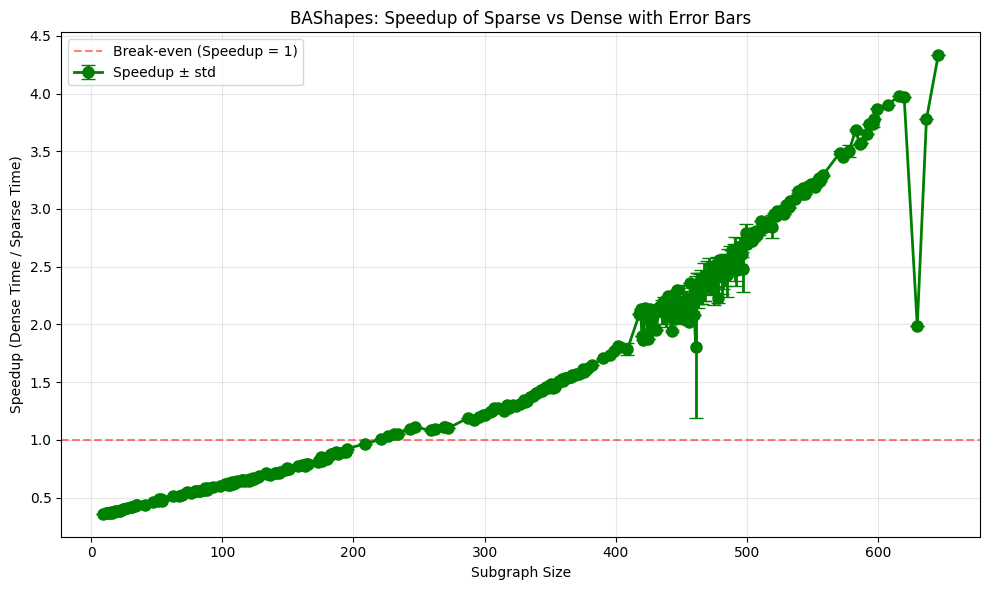

done


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Configuration - easy to change dataset names
DATASET_NAMES = ['BAShapes Sparse', 'BAShapes Dense']  # Change to ['BAShapes Sparse', 'BAShapes Dense'] as needed
# DATASET_NAMES = ['BAShapes Sparse', 'BAShapes Dense']  # Alternative

# Filter for the experiments
bashapes_data = df[df['dataset'].isin(DATASET_NAMES)]

# Create separate dataframes for dense and sparse
bashapes_dense = bashapes_data[bashapes_data['dataset'] == DATASET_NAMES[1]]  # Dense is second
bashapes_sparse = bashapes_data[bashapes_data['dataset'] == DATASET_NAMES[0]]  # Sparse is first

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

x_axis = 'subgraph_size'

# Plot BAShapes Dense
ax1.scatter(bashapes_dense[x_axis], bashapes_dense['total_train_time'],
           alpha=0.7, s=50, label=f'{DATASET_NAMES[1]}', color='blue')
ax1.set_xlabel('Subgraph Size')
ax1.set_ylabel('Total Train Time')
ax1.set_title(f'{DATASET_NAMES[1]}: Train Time vs Subgraph Size')
ax1.grid(True, alpha=0.3)

# Plot BAShapes Sparse
ax2.scatter(bashapes_sparse[x_axis], bashapes_sparse['total_train_time'],
           alpha=0.7, s=50, color='orange', label=f'{DATASET_NAMES[0]}')
ax2.set_xlabel('Subgraph Size')
ax2.set_ylabel('Total Train Time')
ax2.set_title(f'{DATASET_NAMES[0]}: Train Time vs Subgraph Size')
ax2.grid(True, alpha=0.3)

# Add trend lines if you want
z1 = np.polyfit(bashapes_dense[x_axis], bashapes_dense['total_train_time'], 3)
p1 = np.poly1d(z1)
ax1.plot(bashapes_dense[x_axis].sort_values(),
        p1(bashapes_dense[x_axis].sort_values()),
        "r--", alpha=0.8, linewidth=2, label=f'Trend (slope={z1[0]:.4f})')

z2 = np.polyfit(bashapes_sparse[x_axis], bashapes_sparse['total_train_time'], 2)
p2 = np.poly1d(z2)
ax2.plot(bashapes_sparse[x_axis].sort_values(),
        p2(bashapes_sparse[x_axis].sort_values()),
        "r--", alpha=0.8, linewidth=2, label=f'Trend (slope={z2[0]:.4f})')

ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()

# Alternative: Combined plot with both dense and sparse
plt.figure(figsize=(10, 6))

# Plot both on same figure with correct colors
plt.scatter(bashapes_dense[x_axis], bashapes_dense['total_train_time'],
           alpha=0.7, s=50, label=f'{DATASET_NAMES[1]}', color='blue')
plt.scatter(bashapes_sparse[x_axis], bashapes_sparse['total_train_time'],
           alpha=0.7, s=50, label=f'{DATASET_NAMES[0]}', color='orange')

plt.xlabel('Subgraph Size')
plt.ylabel('Total Train Time')
plt.title(f'{DATASET_NAMES[1].split()[0]}: Train Time vs Subgraph Size (Dense vs Sparse)')
plt.grid(True, alpha=0.3)
plt.legend()

# Add trend lines
plt.plot(bashapes_dense[x_axis].sort_values(),
        p1(bashapes_dense[x_axis].sort_values()),
        "b--", alpha=0.8, linewidth=2, label=f'{DATASET_NAMES[1]} Trend')
plt.plot(bashapes_sparse[x_axis].sort_values(),
        p2(bashapes_sparse[x_axis].sort_values()),
        "r--", alpha=0.8, linewidth=2, label=f'{DATASET_NAMES[0]} Trend')

plt.legend()
plt.tight_layout()
plt.show()

# Speedup Plot: Dense time / Sparse time (how many times faster sparse is than dense)
plt.figure(figsize=(10, 6))

# Get unique subgraph sizes
subgraph_sizes = sorted(bashapes_data[x_axis].unique())

# Calculate average times for each subgraph size
speedup_data = []
speedup_std = []

for size in subgraph_sizes:
    dense_times = bashapes_dense[bashapes_dense[x_axis] == size]['total_train_time']
    sparse_times = bashapes_sparse[bashapes_sparse[x_axis] == size]['total_train_time']

    if len(dense_times) > 0 and len(sparse_times) > 0:
        # Calculate speedup: dense_time / sparse_time
        # If sparse is faster, speedup > 1
        # If dense is faster, speedup < 1
        dense_mean = dense_times.mean()
        sparse_mean = sparse_times.mean()

        if sparse_mean > 0:  # Avoid division by zero
            speedup = dense_mean / sparse_mean
            speedup_data.append(speedup)
        else:
            speedup_data.append(np.nan)
    else:
        speedup_data.append(np.nan)

# Plot speedup
plt.scatter(subgraph_sizes[:len(speedup_data)], speedup_data,
         marker='.', linestyle='-', linewidth=.2, color='green')
plt.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Break-even (Speedup = 1)')

plt.xlabel('Subgraph Size')
plt.ylabel('Speedup (Dense Time / Sparse Time)')
plt.title(f'{DATASET_NAMES[1].split()[0]}: Speedup of Sparse vs Dense')
plt.grid(True, alpha=0.3)
plt.legend()

# Add annotations for interpretation
plt.text(0.02, 0.98, 'Speedup > 1: Sparse is faster',
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.text(0.02, 0.92, 'Speedup < 1: Dense is faster',
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Optional: If you have multiple trials, you can show error bars in speedup plot
if 'trial' in df.columns and len(subgraph_sizes[:len(speedup_data)]) > 0:
    plt.figure(figsize=(10, 6))

    # Calculate speedup with standard deviation
    speedup_with_std = []
    speedup_errors = []

    for size in subgraph_sizes:
        dense_times = bashapes_dense[bashapes_dense[x_axis] == size]['total_train_time']
        sparse_times = bashapes_sparse[bashapes_sparse[x_axis] == size]['total_train_time']

        if len(dense_times) > 0 and len(sparse_times) > 0 and len(dense_times) == len(sparse_times):
            # Calculate speedup for each trial pair
            trial_speedups = []
            for i in range(len(dense_times)):
                if sparse_times.iloc[i] > 0:
                    trial_speedups.append(dense_times.iloc[i] / sparse_times.iloc[i])

            if trial_speedups:
                speedup_with_std.append(np.mean(trial_speedups))
                speedup_errors.append(np.std(trial_speedups))
            else:
                speedup_with_std.append(np.nan)
                speedup_errors.append(0)
        else:
            speedup_with_std.append(np.nan)
            speedup_errors.append(0)

    # Filter out NaN values
    valid_indices = ~np.isnan(speedup_with_std)
    valid_sizes = np.array(subgraph_sizes)[valid_indices]
    valid_speedups = np.array(speedup_with_std)[valid_indices]
    valid_errors = np.array(speedup_errors)[valid_indices]

#     if len(valid_sizes) > 0:
#         plt.errorbar(valid_sizes, valid_speedups, yerr=valid_errors,
#                     fmt='o-', capsize=5, linewidth=2, markersize=8,
#                     color='green', label='Speedup ± std')
#         plt.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Break-even (Speedup = 1)')

#         plt.xlabel('Subgraph Size')
#         plt.ylabel('Speedup (Dense Time / Sparse Time)')
#         plt.title(f'{DATASET_NAMES[1].split()[0]}: Speedup of Sparse vs Dense with Error Bars')
#         plt.grid(True, alpha=0.3)
#         plt.legend()
#         plt.tight_layout()
#         plt.show()

print('done')